# Single or Married?

**Members:** 
1. Jiranun Jiratrakanvong A20337992
2. Sihan Zhao A20351458



**Project Description** : This project will provide the prediction of relationship status by using people tweets. The training data are tweets from people who are single men/women and married men/women. The features of learning are words in tweets.

### 1. Import necessary modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from random import shuffle
import numpy as np
import re
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

### 2. Get all tweets from data folders

#### Specify number of tweets for each category ( MAX = 300 )
(There are 4 categories - single females, single males, married females, and married males. Therefore, if num_tweets_each_cate = 250, there are 500 tweets from single people and 500 tweets from married people)

In [2]:
num_tweets_each_cate = 300

In [3]:
f_cate = open('data/categories.txt','r')
all_tweets = {}

for cate in f_cate:
    cate_name = cate.rstrip()
    file_name = cate_name+'.txt'
    f = open('data/'+file_name, 'r')
    tweets = []
    for tweet in f:
        str_tweet = tweet.rstrip()
        str_tweet = str_tweet.lstrip()
        if str_tweet != '':
            tweets.append(str_tweet) 
    shuffle(tweets) ## Shuffle tweets in order to select tweets randomly from every person
    all_tweets[cate_name] = tweets[0:num_tweets_each_cate]
    print('There are '+str(num_tweets_each_cate)+' from '+ cate_name)

There are 300 from SingleMale
There are 300 from MarriedMale
There are 300 from SingleFemale
There are 300 from MarriedFemale


#### Combine male and female, so the categories are Single or Merried only

In [4]:
single_tweets = all_tweets['SingleFemale'][:]
single_tweets.extend(all_tweets['SingleMale'])
print('There are '+str(len(single_tweets))+' tweets from single people.')

married_tweets = all_tweets['MarriedFemale'][:]
married_tweets.extend(all_tweets['MarriedMale'])
print('There are '+str(len(married_tweets))+' tweets from married people.')

There are 600 tweets from single people.
There are 600 tweets from married people.


#### Combine all tweets and create labels + shuffle them all

In [5]:
all_tweets = np.append(single_tweets[:], married_tweets[:])
labels = np.append(np.zeros(len(single_tweets), dtype=np.int), (np.ones(len(married_tweets), dtype=np.int)))  # label single tweets as 0, and label married tweets as 1
indexes = list(range(0, len(all_tweets)))
shuffle(indexes)
all_tweets = all_tweets[indexes]
labels = labels[indexes]
print("Here's some example of the data...")
print("(0:single, 1:married)")
print("Labels\tTweets")
for i in range(0,10):
    print(str(labels[i])+'\t'+all_tweets[i])

Here's some example of the data...
(0:single, 1:married)
Labels	Tweets
1	I'm blown away by the goodness of the Lord! Over 1000 people came forward to receive Christ!!!!  They also gave... https://t.co/4H1ruQK53O
0	I still need to finish Dead of Summer on Hulu ugh it's so good
0	Night is more beautiful with moonlight...met malam kawan...
0	Little do he know thsis the first break in 4 months
1	Crazy uncle Joe Biden: "I remember dating a guy" what more will we learn about him. https://t.co/UPZAsDBBvg
0	Aint finna be running round with no hoes and thinking shit sweet 👌
0	I just need a day off from reality, just a day without people, problems, and all the bullshit that runs through my mind.
1	Just finished helping place flags for 200,000 veterans, beautiful site. @ Riverside National Cemetery https://t.co/KnVulQNz4y
0	Past week, I touched Churchill's chair, went quad biking, tea at Claridges, broke out of an escape room, and went trampolining. #yolo #wwjfd
0	OUT STANDING VOCALS..... https:/

### 3. Making Features from Data

Create tokenize for making texts to tokens (URLs, mentions, RT, special charactors removed, and make them lowercase)

In [6]:
def tokenize(text):
    text = re.sub('http\S+', ' ', text)
    text = re.sub('@\S+', ' ', text)
    text = text.lower()
    text = text.replace('rt','')
    return re.sub('\W+', ' ', text).split()

Create Features by using CountVectorizer, then fit data by using LogisticRegression

In [7]:
vec = CountVectorizer(tokenizer=tokenize, min_df=5, max_df=1.0, ngram_range=(1,1))
X = vec.fit_transform(all_tweets)
feature_names = vec.get_feature_names()

### 4. Data Visualizations and Statistics

In [8]:
print('There are %d of instances(tweets) and %d features'%(X.shape[0], X.shape[1]))

There are 1200 of instances(tweets) and 438 features


#### Targets

[<matplotlib.text.Text at 0x10855b470>, <matplotlib.text.Text at 0x1083e7f98>]

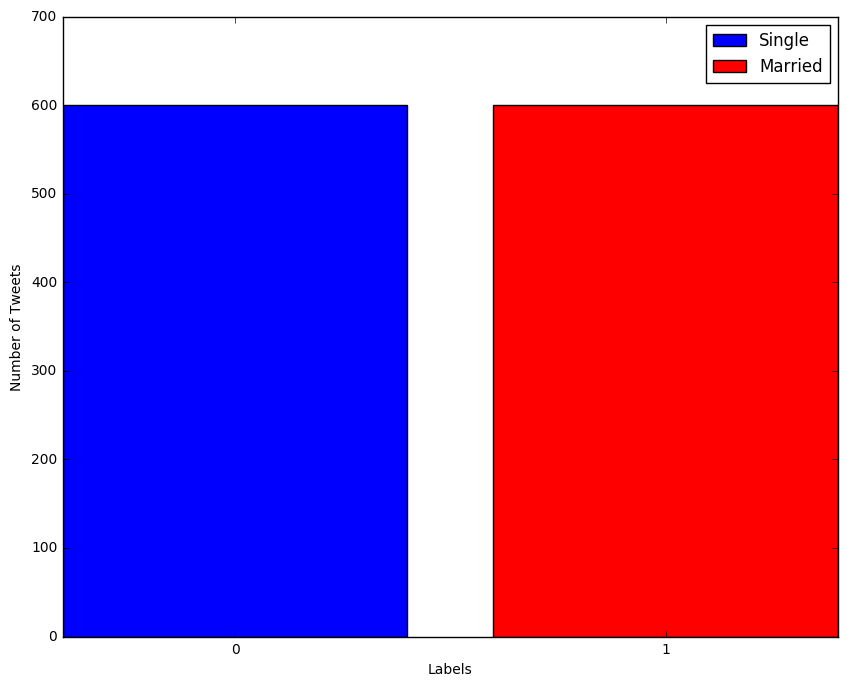

In [9]:
ax = plt.gca()
plt.bar(0, list(labels).count(0), color = 'b', label = 'Single')
plt.bar(1, list(labels).count(1), color = 'r', label = 'Married')
plt.xticks([0,1])
plt.ylabel("Number of Tweets")
plt.xlabel("Labels")
plt.legend()
plt.ylim(0, max(list(labels).count(0),list(labels).count(1))+100)
ax = plt.gca()
ax.set_xticks([0.4,1.4])
ax.set_xticklabels(['0','1'])

#### Features

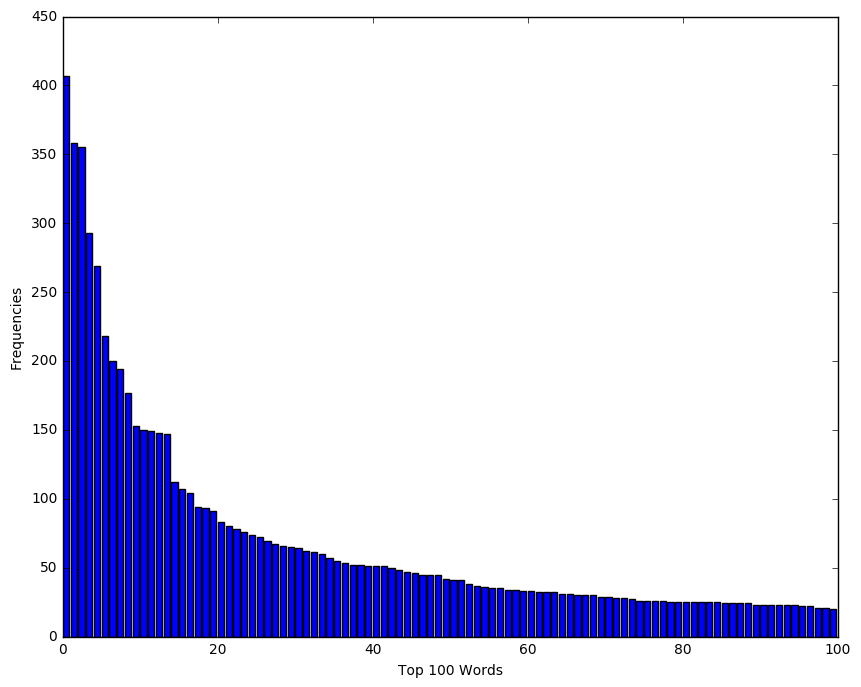

In [10]:
counts = X.sum(axis=0).A1
word_counts = [(feature_names[i],counts[i]) for i in range(0,len(counts))]
sorted_word_counts = sorted(word_counts, key = lambda wc : wc[1] , reverse=True)
sorted_words = [word for (word,count) in sorted_word_counts][:100]
sorted_counts = [count for (word,count) in sorted_word_counts][:100]
# print(sorted_word_counts)
ax = plt.gca()
ax.bar(range(0,len(sorted_words)), sorted_counts)
plt.ylabel('Frequencies')
plt.xlabel('Top 100 Words')

In [11]:
print("Top 100 words with it frequency")
print("Word\tCount")
for i in range(0,100):
    print("%s\t%d"%(sorted_words[i],sorted_counts[i]))

Top 100 words with it frequency
Word	Count
the	407
to	358
i	355
a	293
you	269
and	218
of	200
is	194
it	177
for	153
on	150
in	149
s	148
my	147
t	112
this	107
me	104
with	94
that	93
be	91
your	83
at	80
so	78
are	76
just	74
m	72
not	69
can	67
what	66
love	65
but	64
when	62
all	61
like	60
have	57
amp	55
people	53
via	52
we	52
out	51
time	51
up	51
will	50
who	48
today	47
if	46
don	45
life	45
was	45
do	42
get	41
they	41
by	38
now	37
discount	36
good	35
how	35
from	34
need	34
day	33
our	33
god	32
never	32
or	32
about	31
as	31
always	30
new	30
one	30
go	29
know	29
right	28
want	28
he	27
2	26
99	26
has	26
no	26
3	25
because	25
his	25
more	25
off	25
only	25
win	25
back	24
make	24
re	24
ve	24
5	23
best	23
night	23
really	23
still	23
trump	23
great	22
there	22
next	21
us	21
much	20


In [12]:
clf = LogisticRegression()
clf.fit(X, labels)
weights = clf.coef_[0]
indices = np.argsort(weights)

for i in indices[-10:]:
    print("%s\t %.2f"%(feature_names[i],weights[i]))
for i in indices[:10]:
    print("%s\t %.2f"%(feature_names[i], weights[i]))

stats	 1.06
photo	 1.13
liked	 1.15
makes	 1.17
husband	 1.29
free	 1.30
ad	 1.43
wonderful	 1.51
great	 1.56
discount	 1.73
kitten	 -2.02
someone	 -1.48
who	 -1.44
best	 -1.42
lit	 -1.23
pretty	 -1.12
like	 -1.11
instagood	 -1.10
alone	 -1.07
finally	 -1.04
